<a href="https://colab.research.google.com/github/Mary-prh/Acc_Loss_Plot/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Download a text dataset**

https://www.kaggle.com/c/nlp-getting-started/data 

# **Exploring the data**

In [ ]:
import pandas as pd
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


**It is a good practice to shuffle the data when workin with sequential data to make sure the model is not learning any order**

In [ ]:
train_shuffled = train_data.sample(frac= 1 , random_state= 42)
train_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
train_shuffled.shape

(7613, 5)

In [ ]:
train_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
train_shuffled["target"].isnull().sum()

0

**visualizing if data is balanced**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

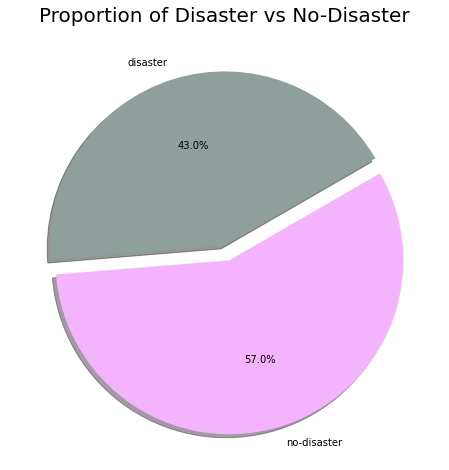

In [ ]:
labels = "disaster", "no-disaster"
sizes = [train_data.target[train_data['target']==1].count() , train_data.target[train_data['target']==0].count()]
explode = (0, 0.09)
colors = ['#8f9f9c','#f4b3fd']
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=30, colors=colors)
plt.title("Proportion of Disaster vs No-Disaster", size = 20)
plt.show()

**Visualize random data**

In [ ]:
import random
random_index = random.randint(0 , len(train_shuffled)-5)
for row in train_shuffled[['text' , 'target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")



Target: 1 (real disaster)
Text:
New: NYC Legionnaires' disease death toll rises http://t.co/NqL21ajmiv #follow (http://t.co/18xQ3FmuGE)

---

Target: 1 (real disaster)
Text:
'American Weapons and Support Are Fueling a Bloody Air War in Yemen' http://t.co/7aGeAkVn2x

---

Target: 1 (real disaster)
Text:
7:13pm #MAPLERIDGE Lougheed Hwy EB is closed between 203rd and Dewdney Trunk Rd because of Collision. ETO is between 8:00 PM and 9:00 PM.

---

Target: 0 (not real disaster)
Text:
@Sweet2Young I came in! Had he fucking moved his entire existence would've been obliterated.

---

Target: 0 (not real disaster)
Text:
Businesses are deluged with invoices. Make yours stand ogt with colomr or shape and it's likely to rise to the top of the pay' pile.

---



# **Splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train_shuffled['text'].to_numpy()
y = train_shuffled['target'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_train[0:5] , y_train[0:5]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
       dtype=object), array([0, 0, 1, 0, 0]))

# **Tokenization and Embedding**

## **Tokenization**

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:

text_vectorizer = TextVectorization(max_tokens= None, 
                                    standardize='lower_and_strip_punctuation',
                                    split = 'whitespace',
                                    ngrams = None,
                                    output_mode = 'int',
                                    output_sequence_length = None,
                                    pad_to_max_tokens=False, 
                                    )

**Average number of tokens per Tweet in the training set.**

In [ ]:
ave_length = round(sum([len(i.split()) for i in X_train]) / len(X_train))      
ave_length

15

In [ ]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=ave_length)

**fit this preprocessing layer on the training data**

In [ ]:
text_vectorizer.adapt(X_train)

***Although the sentence is longer than 15 tokens the vector is limited to 15, as we did. So the dataset can create efficient batches***

In [ ]:
sample = random.choice(X_train)

print(f"Original text:\n{sample}\
      \n\nVectorized version:")
text_vectorizer([sample])

Original text:
@Grazed @invalid @Stretcher @Rexyy @Towel 'Ben favorited'      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[2975, 2921,  725, 3466, 2253, 1716,    1,    0,    0,    0,    0,
           0,    0,    0,    0]])>

***Checking the unique tokens in our vocabulary***

In [ ]:
words = text_vectorizer.get_vocabulary()
words[-5:] #the last 5 ones

['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']

## **Tensorflow Embedding Layer**

In [ ]:
from tensorflow.keras.layers import Embedding 

In [ ]:
embedding = Embedding(input_dim= max_vocab_length, 
                      output_dim= 128 , embeddings_initializer = 'uniform',
                      input_length = ave_length,
                      name = 'embedding_layer_1')

***The process of tokenizer turned the text data into positive intergers which is an essential step for Embedding:***

---

***Each sequence is limited to 15 tokens and Every sinlge token is now in a 128-long vector***

In [ ]:
sample = random.choice(X_train)

print(f"Original text:\n{sample}\
      \n\nVectorized version:")
embedding(text_vectorizer([sample]))

Original text:
Watch This Airport Get Swallowed Up By A Sandstorm In Under A Minute http://t.co/NX2d83A4Du      

Vectorized version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.01400006, -0.00887617,  0.02967957, ..., -0.01847017,
         -0.00115877,  0.04941411],
        [ 0.045178  ,  0.00213807, -0.01942884, ...,  0.03280688,
         -0.04041338, -0.00238543],
        [-0.02171983,  0.01570908,  0.01587183, ..., -0.02256886,
         -0.03437264, -0.04125617],
        ...,
        [-0.00875747,  0.04613585, -0.02973583, ...,  0.00121877,
          0.04883065, -0.01678007],
        [ 0.03967115, -0.04247532, -0.01272404, ..., -0.04056972,
         -0.04764962,  0.0214219 ],
        [ 0.00390651, -0.03660769, -0.03648185, ...,  0.03527988,
         -0.03501172,  0.02543255]]], dtype=float32)>

# **Model 0: Naive Bayes (baseline)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.pipeline import Pipeline # takes the sequential of functions in order

In [ ]:
model_0 = Pipeline([("tfidf" , TfidfVectorizer()),
                    ("NB" , MultinomialNB())])

In [ ]:
# Fit the pipeline to the training data
model_0.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('NB', MultinomialNB())])

In [ ]:
pred_0 = model_0.predict(X_test)

In [ ]:
random_index = random.randint(0 , len(X_test))
random_index

492

In [ ]:
print('Predicted:', model_0.predict(X_test)[random_index])
print('expected:', y_test[random_index])

Predicted: 0
expected: 1


**Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

**Evaluation Function**

In [ ]:
def calculate_results(y_test, y_pred):
  report = classification_report(y_test ,y_pred , output_dict=True)["weighted avg"]
  accuracy = accuracy_score(y_test ,y_pred )
  model_results = {"accuracy": accuracy,
                  "precision": report['precision'],
                  "recall": report['recall'],
                  "f1": report['f1-score']}
  print("Confusion Matrix Result: \n" ,confusion_matrix(y_test ,y_pred))
  print("\n")
  return model_results

In [ ]:
result_0 = calculate_results(y_test,pred_0)
result_0

Confusion Matrix Result: 
 [[386  28]
 [130 218]]




{'accuracy': 0.7926509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

# **Model_1: Feed Forward Model**

In [ ]:
from tensorflow.keras import layers
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"


In [ ]:
Inputs = layers.Input(shape= (1,), dtype = "string") # Texts are one-dimensional strings
x = text_vectorizer(Inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
Output = layers.Dense(1, activation="sigmoid")(x)

Model_1 = tf.keras.Model(Inputs,Output , name= "Model_1")


In [ ]:
Model_1.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_layer_1 (Embeddin  (None, 15, 128)          1280000   
 g)                                                              
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                           

In [ ]:
Model_1.compile(optimizer= "Adam" , loss = "binary_crossentropy",
                metrics = ["accuracy"])

In [ ]:
history_1 = Model_1.fit(x = X_train, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              y = y_train,
                              epochs=5,
                              validation_data=(X_test, y_test),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20220427-153651
Epoch 1/5
215/215 [==============================] - 5s 8ms/step - loss: 0.6100 - accuracy: 0.6903 - val_loss: 0.5315 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.4388 - accuracy: 0.8206 - val_loss: 0.4733 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3455 - accuracy: 0.8609 - val_loss: 0.4558 - val_accuracy: 0.7953
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2829 - accuracy: 0.8930 - val_loss: 0.4604 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2368 - accuracy: 0.9108 - val_loss: 0.4762 - val_accuracy: 0.7874


In [ ]:
pred_probs_1 = Model_1.predict(X_test)
pred_probs_1.shape

(762, 1)

In [ ]:
pred_probs_1[:10]

array([[0.43547496],
       [0.8189942 ],
       [0.99779546],
       [0.1129105 ],
       [0.1136914 ],
       [0.9453963 ],
       [0.9048086 ],
       [0.99364424],
       [0.9656352 ],
       [0.26634395]], dtype=float32)

**convert probabilities to labels**

In [ ]:
squeezed = tf.squeeze(pred_probs_1)
squeezed.shape

TensorShape([762])

In [ ]:
preds_1 = tf.round(squeezed)
preds_1[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
result_1 = calculate_results(y_test, preds_1)
result_1

Confusion Matrix Result: 
 [[362  52]
 [110 238]]




{'accuracy': 0.7874015748031497,
 'f1': 0.7846966492209201,
 'precision': 0.7914920592553047,
 'recall': 0.7874015748031497}

In [ ]:
result_0

{'accuracy': 0.7926509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

**Visualizing learned embeddings**

---
**weights of the embedding layer:**


In [ ]:
weights = Model_1.get_layer(name = "embedding_layer_1").get_weights()[0]
weights

array([[-0.01265569, -0.02095258, -0.02356919, ...,  0.05303628,
        -0.02462559,  0.04311198],
       [ 0.03254483, -0.03563333, -0.00879783, ..., -0.03700865,
        -0.04552828,  0.0294141 ],
       [-0.05309772, -0.0262849 ,  0.00982855, ...,  0.01967707,
         0.04129314, -0.03432522],
       ...,
       [ 0.01160935,  0.00902095, -0.03123798, ...,  0.03735125,
        -0.02265601, -0.0280586 ],
       [-0.00074121,  0.0182308 ,  0.06412024, ...,  0.06692871,
         0.03805698, -0.00641722],
       [-0.05394221,  0.02733327,  0.02308781, ...,  0.0261683 ,
         0.10596393,  0.04651372]], dtype=float32)

In [ ]:
weights.shape # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

(10000, 128)

**Embedding Projector**

https://projector.tensorflow.org/ 

https://www.tensorflow.org/text/guide/word_embeddings

---
We have 128 dimesions in our problem which are reduced to 3 features by PCA in Embedding Projector


In [ ]:
# import io
# out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
# out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

# for index, word in enumerate(words):
#   if index == 0:
#     continue  # skip 0, it's padding.
#   vec = weights[index]
#   out_v.write('\t'.join([str(x) for x in vec]) + "\n")
#   out_m.write(word + "\n")
# out_v.close()
# out_m.close()

In [ ]:
# # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("vectors.tsv")
#   files.download("metadata.tsv")

# **Model_2: RNN (LSTM)**

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Setup text vectorization with custom variables
ave_length = round(sum([len(i.split()) for i in X_train]) / len(X_train))   
max_vocab_length = 10000 # max number of words to have in our vocabulary

model_2_embedding = layers.Embedding(input_dim= max_vocab_length,
                                     output_dim= 128, input_length= ave_length,
                                     name= "embedding_2")

Inputs = layers.Input(shape= (1,), dtype = "string") # Texts are one-dimensional strings
x = text_vectorizer(Inputs)
x = model_2_embedding(x)
x = layers.LSTM(units = 64 , return_sequences= True )(x) #the previous layer must have 3-dimensions
x = layers.LSTM(units = 64)(x)
Output = layers.Dense(1, activation= 'sigmoid')(x)

model_2 = tf.keras.Model(Inputs, Output)

In [ ]:
model_2.compile(optimizer='Adam', loss = 'binary_crossentropy',
                metrics= ['accuracy'])

In [ ]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

In [ ]:
history_2 = model_2.fit(x = X_train,
                              y = y_train,
                              epochs=5,
                              validation_data=(X_test, y_test),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20220427-153715
Epoch 1/5
215/215 [==============================] - 14s 25ms/step - loss: 0.5045 - accuracy: 0.7510 - val_loss: 0.4585 - val_accuracy: 0.7874
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3181 - accuracy: 0.8736 - val_loss: 0.5159 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.2227 - accuracy: 0.9168 - val_loss: 0.5520 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.1613 - accuracy: 0.9457 - val_loss: 0.6996 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.1110 - accuracy: 0.9591 - val_loss: 0.8517 - val_accuracy: 0.7585


In [ ]:
pred_probs_2 = model_2.predict(X_test)
pred_probs_2[-5:]

array([[4.0567273e-01],
       [3.3320174e-01],
       [7.2457379e-01],
       [4.9369600e-01],
       [6.2738953e-04]], dtype=float32)

In [ ]:
squeezed = tf.squeeze(pred_probs_2)

preds_2 = tf.round(squeezed)

In [ ]:
result_2 = calculate_results(y_test, preds_2)
result_2

Confusion Matrix Result: 
 [[343  71]
 [113 235]]




{'accuracy': 0.7585301837270341,
 'f1': 0.7566051475454213,
 'precision': 0.7593999956661763,
 'recall': 0.7585301837270341}

# **Model_3: RNN (GRU)**

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Setup text vectorization with custom variables
ave_length = round(sum([len(i.split()) for i in X_train]) / len(X_train))   
max_vocab_length = 10000 # max number of words to have in our vocabulary

model_3_embedding = layers.Embedding(input_dim= max_vocab_length,
                                     output_dim= 128, input_length= ave_length,
                                     name= "embedding_3")

Inputs = layers.Input(shape= (1,), dtype = "string") # Texts are one-dimensional strings
x = text_vectorizer(Inputs)
x = model_3_embedding(x)
x = layers.LSTM(units = 64 , return_sequences= True )(x) #the previous layer must have 3-dimensions
x = layers.GRU(units = 64)(x)
Output = layers.Dense(1, activation= 'sigmoid')(x)

model_3 = tf.keras.Model(Inputs, Output)

In [ ]:
model_3.compile(optimizer='Adam', loss = 'binary_crossentropy',
                metrics= ['accuracy'])

In [ ]:
model_3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_2 (LSTM)               (None, 15, 64)            49408     
                                                                 
 gru (GRU)                   (None, 64)                24960     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                           

In [ ]:
history_3 = model_3.fit(x = X_train,
                              y = y_train,
                              epochs=5,
                              validation_data=(X_test, y_test),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20220427-153749
Epoch 1/5
215/215 [==============================] - 11s 18ms/step - loss: 0.5046 - accuracy: 0.7507 - val_loss: 0.4534 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3137 - accuracy: 0.8726 - val_loss: 0.5039 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2154 - accuracy: 0.9172 - val_loss: 0.5744 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1497 - accuracy: 0.9485 - val_loss: 0.6909 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.1036 - accuracy: 0.9648 - val_loss: 0.7193 - val_accuracy: 0.7533


**Evaluation**

In [ ]:
pred_probs_3 = model_3.predict(X_test)
squeezed = tf.squeeze(pred_probs_3)

preds_3 = tf.round(squeezed)
result_3 = calculate_results(y_test, preds_2)
result_3

Confusion Matrix Result: 
 [[343  71]
 [113 235]]




{'accuracy': 0.7585301837270341,
 'f1': 0.7566051475454213,
 'precision': 0.7593999956661763,
 'recall': 0.7585301837270341}

# **Model_4: RNN (Bidirectional)**

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Setup text vectorization with custom variables
ave_length = round(sum([len(i.split()) for i in X_train]) / len(X_train))   
max_vocab_length = 10000 # max number of words to have in our vocabulary

model_4_embedding = layers.Embedding(input_dim= max_vocab_length,
                                     output_dim= 128, input_length= ave_length,
                                     name= "embedding_3")

Inputs = layers.Input(shape= (1,), dtype = "string") # Texts are one-dimensional strings
x = text_vectorizer(Inputs)
x = model_4_embedding(x)
x= layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)

x= layers.Bidirectional(layers.GRU(64, return_sequences=False))(x)

Output = layers.Dense(1, activation= 'sigmoid')(x)

model_4 = tf.keras.Model(Inputs, Output)

In [ ]:
model_4.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                                           

In [ ]:
model_4.compile(optimizer='Adam', loss = 'binary_crossentropy',
                metrics= ['accuracy'])

In [ ]:
history_4 = model_4.fit(x = X_train,
                              y = y_train,
                              epochs=5,
                              validation_data=(X_test, y_test),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "BRNN")])

Saving TensorBoard log files to: model_logs/BRNN/20220427-153817
Epoch 1/5
215/215 [==============================] - 21s 42ms/step - loss: 0.5058 - accuracy: 0.7466 - val_loss: 0.4514 - val_accuracy: 0.7927
Epoch 2/5
215/215 [==============================] - 6s 29ms/step - loss: 0.3097 - accuracy: 0.8733 - val_loss: 0.5065 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 7s 31ms/step - loss: 0.2052 - accuracy: 0.9204 - val_loss: 0.5602 - val_accuracy: 0.7546
Epoch 4/5
215/215 [==============================] - 6s 26ms/step - loss: 0.1372 - accuracy: 0.9546 - val_loss: 0.6768 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0992 - accuracy: 0.9660 - val_loss: 0.6979 - val_accuracy: 0.7664


In [ ]:
pred_probs_4 = model_4.predict(X_test)
squeezed = tf.squeeze(pred_probs_4)

preds_4 = tf.round(squeezed)
result_4 = calculate_results(y_test, preds_4)
result_4

Confusion Matrix Result: 
 [[354  60]
 [118 230]]




{'accuracy': 0.7664041994750657,
 'f1': 0.7634321207489121,
 'precision': 0.7696850393700787,
 'recall': 0.7664041994750657}

In [ ]:
result_0

{'accuracy': 0.7926509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

# **Model_5: CNN-1D**

In [ ]:
from tensorflow.keras import layers

model_5_embedding = layers.Embedding(input_dim= max_vocab_length, output_dim= 128,
                                     input_length = ave_length, name="embedding_5")


Inputs = layers.Input(shape = (1,), dtype = "string" , name="Input_Layer")
x = text_vectorizer(Inputs)
x = model_5_embedding(x)
x = layers.Conv1D(activation= "relu", strides= 1, filters=64, kernel_size=5,
                  padding = "same")(x) #filters: how many conv1D layers , kernel_size:how many words it looks at a time
# x = layers.Conv1D(
#                   activation= "relu", strides= 1, filters=32, kernel_size=2,
#                   padding = "same")(x) 
x = layers.GlobalMaxPool1D()(x)

Output = layers.Dense(1, activation = 'sigmoid')(x)

model_5 = tf.keras.Model(Inputs, Output)



In [ ]:
model_5.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 15, 64)            41024     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 1)                 65  

In [ ]:
model_5.compile(optimizer='Adam' , loss= 'binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
history_5 = model_5.fit(x = X_train,
                              y = y_train,
                              epochs=5,
                              validation_data=(X_test, y_test),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "CONV1D")])

Saving TensorBoard log files to: model_logs/CONV1D/20220427-153904
Epoch 1/5
215/215 [==============================] - 9s 9ms/step - loss: 0.5537 - accuracy: 0.7196 - val_loss: 0.4588 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.3290 - accuracy: 0.8662 - val_loss: 0.4742 - val_accuracy: 0.7913
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2010 - accuracy: 0.9267 - val_loss: 0.5442 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1246 - accuracy: 0.9612 - val_loss: 0.6228 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0853 - accuracy: 0.9714 - val_loss: 0.6912 - val_accuracy: 0.7795


In [ ]:
pred_probs_5 = model_5.predict(X_test)
squeezed = tf.squeeze(pred_probs_5)

preds_5 = tf.round(squeezed)
result_5 = calculate_results(y_test, preds_5)
result_5

Confusion Matrix Result: 
 [[355  59]
 [109 239]]




{'accuracy': 0.7795275590551181,
 'f1': 0.7772730329412364,
 'precision': 0.7819506047193071,
 'recall': 0.7795275590551181}

# **Model_6: Transfer Learning (feature extraction)**

**the embedding layer is downloaded from tensorflow hub, and it adjusts the weights by this model**

---

The number of features (shape of the embedding layer) depends on the selected encoder

In [ ]:
import tensorflow_hub as hub
# embedding_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
encoder_layer_1 = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", 
                                  input_shape = [], 
                                  dtype="string",
                                  trainable=False)

In [ ]:
encoder_layer_2 = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer , Dropout  , Dense 

model_6 = Sequential()

model_6.add(encoder_layer_2)
model_6.add(Dense(64, activation='relu')) #add a dense layer to make it work better
model_6.add(Dense(1, activation='sigmoid'))


In [ ]:
model_6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_28 (Dense)            (None, 64)                32832     
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 256,830,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_6.compile(optimizer='Adam' , loss= 'binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
history_6 = model_6.fit(x = X_train,
                              y = y_train,
                              epochs=5,
                              validation_data=(X_test, y_test),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "CONV1D")])

Saving TensorBoard log files to: model_logs/CONV1D/20220427-153929
Epoch 1/5
215/215 [==============================] - 8s 22ms/step - loss: 0.5086 - accuracy: 0.7853 - val_loss: 0.4499 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.4153 - accuracy: 0.8148 - val_loss: 0.4382 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 4s 21ms/step - loss: 0.4005 - accuracy: 0.8216 - val_loss: 0.4336 - val_accuracy: 0.8084
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3932 - accuracy: 0.8272 - val_loss: 0.4291 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3869 - accuracy: 0.8298 - val_loss: 0.4298 - val_accuracy: 0.8150


In [ ]:
pred_probs_6 = model_6.predict(X_test)
squeezed = tf.squeeze(pred_probs_6)

preds_6 = tf.round(squeezed)
result_6 = calculate_results(y_test, preds_6)
result_6

Confusion Matrix Result: 
 [[365  49]
 [ 92 256]]




{'accuracy': 0.8149606299212598,
 'f1': 0.8134357776936025,
 'precision': 0.8172549323109193,
 'recall': 0.8149606299212598}

# **Model_7: Transfer Learning (feature extraction) with 10% data**

In [ ]:
from sklearn.model_selection import train_test_split

X_train_90, X_train_10, y_train_90, y_train_10 = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
import tensorflow_hub as hub

encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", 
                                  input_shape = [], 
                                  dtype="string",
                                  trainable=False)

model_7 = Sequential()
model_7.add(encoder_layer)
model_7.add(Dense(64, activation='relu'))
model_7.add(Dense(1, activation='sigmoid'))

model_7.summary()

# Clone model_6 but reset weights
# model_7 = tf.keras.models.clone_model(model_6)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_7.compile(optimizer='Adam' , loss= 'binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
history_7 = model_7.fit(x = X_train_10,
                              y = y_train_10,
                              epochs=5,
                              validation_data=(X_test, y_test),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "TL_10_per")])

Saving TensorBoard log files to: model_logs/TL_10_per/20220427-154018
Epoch 1/5
22/22 [==============================] - 4s 70ms/step - loss: 0.6700 - accuracy: 0.6968 - val_loss: 0.6470 - val_accuracy: 0.7165
Epoch 2/5
22/22 [==============================] - 1s 49ms/step - loss: 0.5951 - accuracy: 0.8061 - val_loss: 0.5895 - val_accuracy: 0.7507
Epoch 3/5
22/22 [==============================] - 1s 35ms/step - loss: 0.5180 - accuracy: 0.8178 - val_loss: 0.5387 - val_accuracy: 0.7664
Epoch 4/5
22/22 [==============================] - 1s 48ms/step - loss: 0.4548 - accuracy: 0.8397 - val_loss: 0.5076 - val_accuracy: 0.7690
Epoch 5/5
22/22 [==============================] - 1s 33ms/step - loss: 0.4119 - accuracy: 0.8455 - val_loss: 0.4899 - val_accuracy: 0.7795


In [ ]:
pred_probs_7 = model_7.predict(X_test)
squeezed = tf.squeeze(pred_probs_7)

preds_7 = tf.round(squeezed)
result_7 = calculate_results(y_test, preds_7)
result_7

Confusion Matrix Result: 
 [[360  54]
 [114 234]]




{'accuracy': 0.7795275590551181,
 'f1': 0.7765763088894867,
 'precision': 0.7837012857570019,
 'recall': 0.7795275590551181}

# **Comparing the results**

In [ ]:
compare_results = pd.DataFrame({"baseline": result_0,
                                  "simple_dense": result_1,
                                  "lstm": result_2,
                                  "gru": result_3,
                                  "bidirectional": result_4,
                                  "conv1d": result_5,
                                  "tf_hub_sentence_encoder": result_6,
                                  "tf_hub_10_percent_data": result_7})

In [ ]:
compare_results = compare_results.transpose()
compare_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.787402,0.791492,0.787402,0.784697
lstm,0.758530,0.759400,0.758530,0.756605
gru,0.758530,0.759400,0.758530,0.756605
bidirectional,0.766404,0.769685,0.766404,0.763432
conv1d,0.779528,0.781951,0.779528,0.777273
tf_hub_sentence_encoder,0.814961,0.817255,0.814961,0.813436
tf_hub_10_percent_data,0.779528,0.783701,0.779528,0.776576


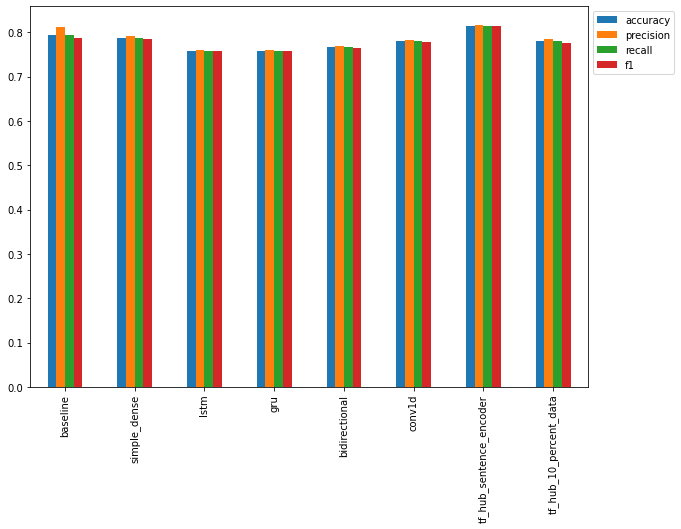

In [ ]:
compare_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

# **Model Driven Data Exploration (Active Learning)**

In [ ]:
X_test.shape , y_test.shape , pred_probs_6.shape , preds_6.shape

((762,), (762,), (762, 1), TensorShape([762]))

In [ ]:
import pandas as pd
eval_def = pd.DataFrame({"Text": X_test ,
                         "Label": y_test,
                         "pred": preds_6,
                         "pred_probs": tf.squeeze(pred_probs_6)})
eval_def

,Text,Label,pred,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.160239
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747925
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.985289
3,@camilacabello97 Internally and externally scr...,1,0.0,0.203883
4,Radiation emergency #preparedness starts with ...,1,1.0,0.728452
...,...,...,...,...
757,That's the ultimate road to destruction,0,0.0,0.104719
758,@SetZorah dad why dont you claim me that mean ...,0,0.0,0.105596
759,FedEx will no longer transport bioterror patho...,0,1.0,0.861057
760,Crack in the path where I wiped out this morni...,0,1.0,0.683122


**Find the wrong predictions and sort by prediction probabilities (False Positives)**

In [ ]:
worst_cases = eval_def[eval_def["Label"] != eval_def["pred"]].sort_values(by=['pred_probs'], ascending=False)
worst_cases

,Text,Label,pred,pred_probs
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.912589
759,FedEx will no longer transport bioterror patho...,0,1.0,0.861057
628,@noah_anyname That's where the concentration c...,0,1.0,0.854388
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.848216
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.822640
...,...,...,...,...
233,I get to smoke my shit in peace,1,0.0,0.042524
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038251
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.035544
38,Why are you deluged with low self-image? Take ...,1,0.0,0.035014


In [ ]:
worst_cases.count()

Text          141
Label         141
pred          141
pred_probs    141
dtype: int64

In [ ]:
worst_cases.tail() #False Negatives

,Text,Label,pred,pred_probs
233,I get to smoke my shit in peace,1,0.0,0.042524
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038251
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.035544
38,Why are you deluged with low self-image? Take ...,1,0.0,0.035014
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.033270


In [ ]:
for i in worst_cases[:5].itertuples():
  _ , text, label, pred,pred_probs = i
  print(f"True Label: {label} , Predicted Label: {pred} ,  Prediction Probability: {pred_probs}")
  print(f"Text:\n {text}")
  print("___________\n")

True Label: 0 , Predicted Label: 1.0 ,  Prediction Probability: 0.9125893712043762
Text:
 ? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying
___________

True Label: 0 , Predicted Label: 1.0 ,  Prediction Probability: 0.8610566854476929
Text:
 FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J
___________

True Label: 0 , Predicted Label: 1.0 ,  Prediction Probability: 0.8543878197669983
Text:
 @noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.
___________

True Label: 0 , Predicted Label: 1.0 ,  Prediction Probability: 0.8482164740562439
Text:
 @SonofLiberty357 all illuminated by the brightly burning buildings all around the town!
___________

True Label: 0 , Predicted Label: 1.0 ,  Prediction Probability: 0.8226404786109924
Text:
 @madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods
_______

In [ ]:
for i in worst_cases[-5:].itertuples():
  _ , text, label, pred,pred_probs = i
  print(f"True Label: {label} , Predicted Label: {pred} ,  Prediction Probability: {pred_probs}")
  print(f"Text:\n {text}")
  print("___________\n")

True Label: 1 , Predicted Label: 0.0 ,  Prediction Probability: 0.042523618787527084
Text:
 I get to smoke my shit in peace
___________

True Label: 1 , Predicted Label: 0.0 ,  Prediction Probability: 0.03825141116976738
Text:
 Reddit Will Now QuarantineÛ_ http://t.co/pkUAMXw6pm #onlinecommunities #reddit #amageddon #freespeech #Business http://t.co/PAWvNJ4sAP
___________

True Label: 1 , Predicted Label: 0.0 ,  Prediction Probability: 0.035544127225875854
Text:
 @SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren
___________

True Label: 1 , Predicted Label: 0.0 ,  Prediction Probability: 0.03501410037279129
Text:
 Why are you deluged with low self-image? Take the quiz: http://t.co/XsPqdOrIqj http://t.co/CQYvFR4UCy
___________

True Label: 1 , Predicted Label: 0.0 ,  Prediction Probability: 0.033269982784986496
Text:
 Ron &amp; Fez - Dave's High School Crush https://t.co/aN3W16c8F6 via @YouTube
___________



# **Result on Test Dataset: test.csv**

In [ ]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
test_sentences = test_data["text"].to_list()
test_sample = random.sample(test_sentences, 10)

pred_probs_test_6 = model_6.predict(test_sample)
squeezed = tf.squeeze(pred_probs_test_6)
preds_test_6 = tf.round(squeezed)

In [ ]:
len(test_sample)

10

In [ ]:
for i in range(len(test_sample)):
  print(f"Predicted Label: {preds_test_6[i]} ,  Prediction Probability: {pred_probs_test_6[i]}")
  print(f"Text:\n {test_sample[i]}")
  print("___________\n")

Predicted Label: 1.0 ,  Prediction Probability: [0.5677223]
Text:
 @Jinxy1888 Genius economist! Let's double pay of all emergency services military teachers etc to that tube drivers #PayForItHow #tubestrike
___________

Predicted Label: 0.0 ,  Prediction Probability: [0.05942505]
Text:
 I liked a @YouTube video http://t.co/EVEdsU5PB0 Camp Out! | BUNK'D | Disney Channel
___________

Predicted Label: 1.0 ,  Prediction Probability: [0.78512233]
Text:
 . @paulrogers002 Many #cancers which had a very high fatality rate 30 years ago kill a lot less today. #Oncology has achieved a lot.
___________

Predicted Label: 0.0 ,  Prediction Probability: [0.15521722]
Text:
 Another fun night. My daughter gets a flat tire on her car. Calls and doesn't know how to change it. Worst rainstorm all year. Now she knows
___________

Predicted Label: 1.0 ,  Prediction Probability: [0.8993467]
Text:
 Port Coquitlam fire burning several businesses http://t.co/Q5FzYLBvTk
___________

Predicted Label: 0.0 ,  Predi

# **Model_8: Transfer Learning (feature extraction) on all data**

**the embedding layer is downloaded from tensorflow hub, and it adjusts the weights by this model**

---

The number of features (shape of the embedding layer) depends on the selected encoder

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
import pandas as pd
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [ ]:
submit_data = pd.read_csv("sample_submission.csv")
submit_data.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [ ]:
train_data.head(1)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1


In [ ]:
test_data.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [ ]:
from sklearn.model_selection import train_test_split
X = train_data['text'].to_numpy()
y = train_data['target'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
test_text = test_data['text'].to_numpy()

In [ ]:
encoder_layer_1 = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", 
                                  input_shape = [], 
                                  dtype="string",
                                  trainable=False)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer , Dropout  , Dense 

model_8 = Sequential()

model_8.add(encoder_layer_1)
model_8.add(Dense(64, activation='relu')) #add a dense layer to make it work better
model_8.add(Dense(1, activation='sigmoid'))


In [ ]:
model_8.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_32 (Dense)            (None, 64)                32832     
                                                                 
 dense_33 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Creating learning rate reduction callback
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",  
                                                #  factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                #  patience=2,
                                                #  verbose=1, # print out when learning rate goes down 
                                                #  min_lr=1e-7)

In [ ]:
model_8.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss= 'binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
history_8 = model_8.fit(x = X_train, y = y_train,
                        steps_per_epoch=len(X_train),
                        epochs=10,
                        validation_data=(X_test,y_test), 
                        callbacks=[early_stopping])

Epoch 1/10
6851/6851 [==============================] - 65s 9ms/step - loss: 0.4477 - accuracy: 0.7975 - val_loss: 0.4154 - val_accuracy: 0.8163
Epoch 2/10
6851/6851 [==============================] - 54s 8ms/step - loss: 0.4016 - accuracy: 0.8250 - val_loss: 0.3970 - val_accuracy: 0.8215
Epoch 3/10
6851/6851 [==============================] - 53s 8ms/step - loss: 0.3746 - accuracy: 0.8370 - val_loss: 0.4027 - val_accuracy: 0.8241
Epoch 4/10
6851/6851 [==============================] - 54s 8ms/step - loss: 0.3430 - accuracy: 0.8556 - val_loss: 0.4023 - val_accuracy: 0.8241
Epoch 5/10
6851/6851 [==============================] - 53s 8ms/step - loss: 0.3113 - accuracy: 0.8716 - val_loss: 0.4150 - val_accuracy: 0.8241


In [ ]:
losses = pd.DataFrame(history_8.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.447682,0.797548,0.415352,0.816273
1,0.401630,0.824989,0.397010,0.821522
2,0.374625,0.836958,0.402667,0.824147
3,0.343029,0.855641,0.402297,0.824147
4,0.311269,0.871552,0.414954,0.824147


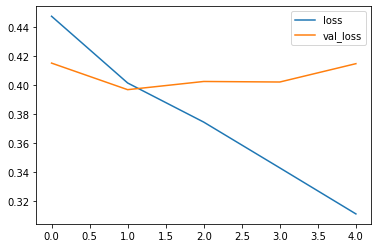

In [ ]:
losses[['loss', 'val_loss']].plot()

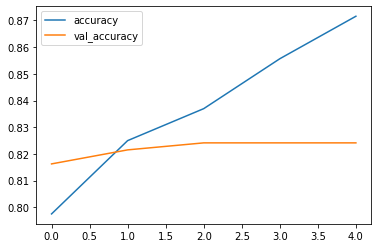

In [ ]:
losses[['accuracy', 'val_accuracy']].plot()

In [ ]:
pred_probs_8 = model_8.predict(test_text)
pred_probs_8[:3]

array([[0.4039405 ],
       [0.96898717],
       [0.638775  ]], dtype=float32)

In [ ]:
squeezed = tf.squeeze(pred_probs_8)

preds_8 = tf.round(squeezed)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 1., 1.], dtype=float32)>

In [ ]:
preds_8.dtype

tf.float32

In [ ]:
Sample_Submission = pd.DataFrame({'id': test_data["id"] ,
                                  'target': preds_8})

In [ ]:
Sample_Submission.head()

,id,target
0,0,0.0
1,2,1.0
2,3,1.0
3,9,1.0
4,11,1.0


In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
Sample_Submission.to_csv('Sample_Submission.csv')
!cp Sample_Submission.csv "drive/MyDrive/"